## Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
df = pd.read_csv("weather_preprocessed.csv")

In [5]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,27,13.4,22.9,0.6,6.4,0.4,4.0,44.0,5.0,3.0,...,1007.7,1007.1,8.0,7.0,16.9,21.8,False,False,12,1
1,27,7.4,25.1,0.0,7.6,11.2,2.0,44.0,0.0,6.0,...,1010.6,1007.8,7.0,7.0,17.2,24.3,False,False,12,2
2,27,12.9,25.7,0.0,8.0,0.7,5.0,46.0,5.0,6.0,...,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False,12,3
3,27,9.2,28.0,0.0,2.6,7.3,11.0,24.0,13.0,14.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,False,False,12,4
4,27,17.5,32.3,1.0,2.8,0.1,4.0,41.0,12.0,0.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12,5


## Feature Selection

#### Correlation

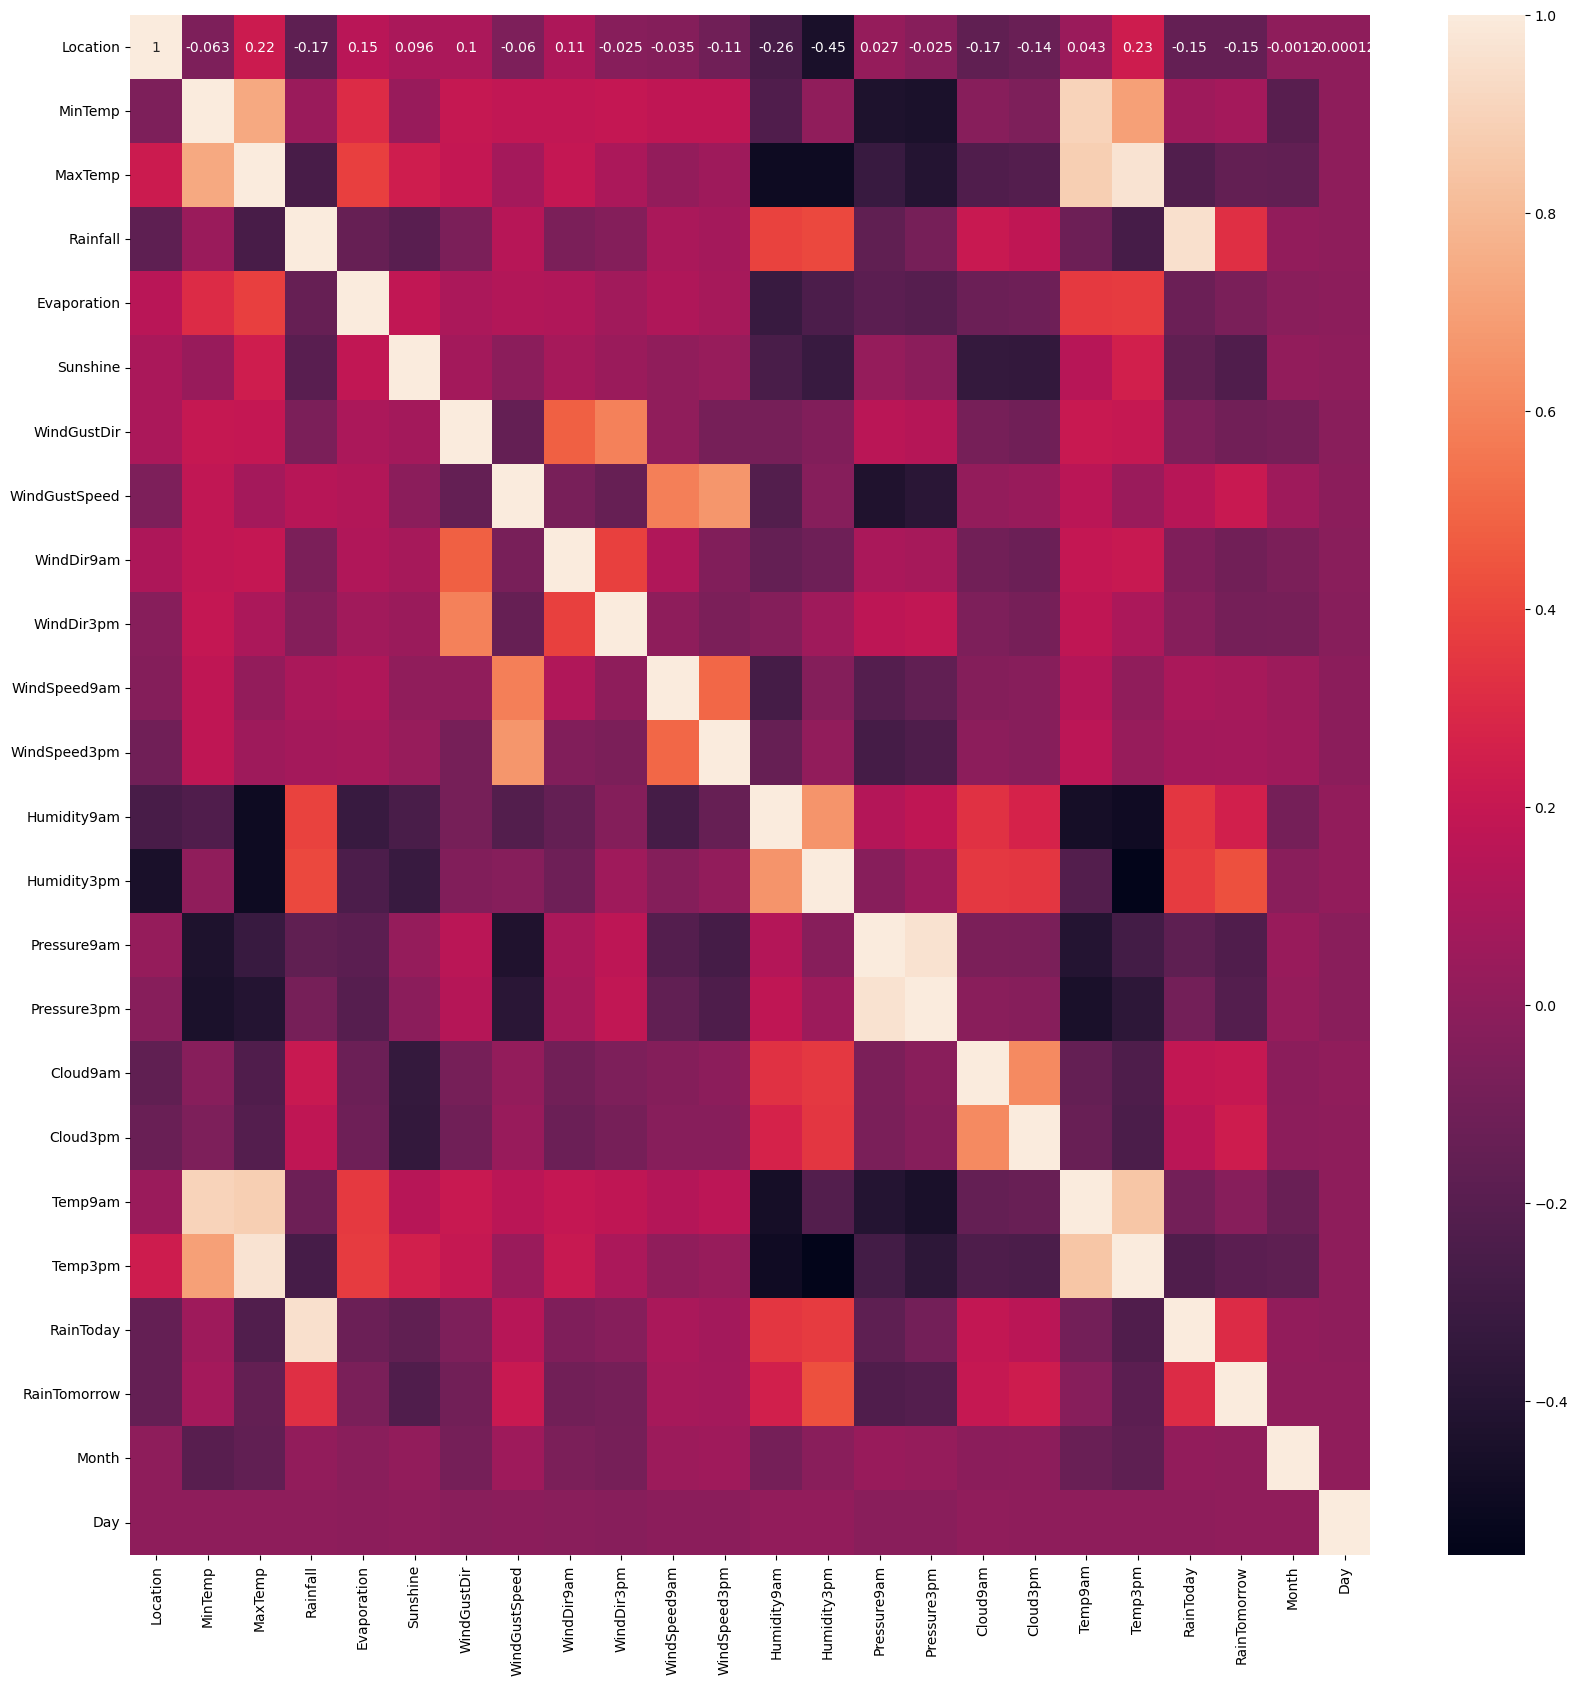

In [6]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

#### Dividing the dataset into independent and dependent features

In [8]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

#### Extra Trees Classifier

In [9]:
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

In [10]:
print(selection.feature_importances_)

[0.03801715 0.03788987 0.03670979 0.05059153 0.03329036 0.04691106
 0.03340092 0.05221433 0.0337741  0.03459202 0.03344244 0.03486567
 0.04728653 0.14231056 0.04695465 0.0501516  0.0320385  0.0410302
 0.03539296 0.03871164 0.03374943 0.03278123 0.03389347]


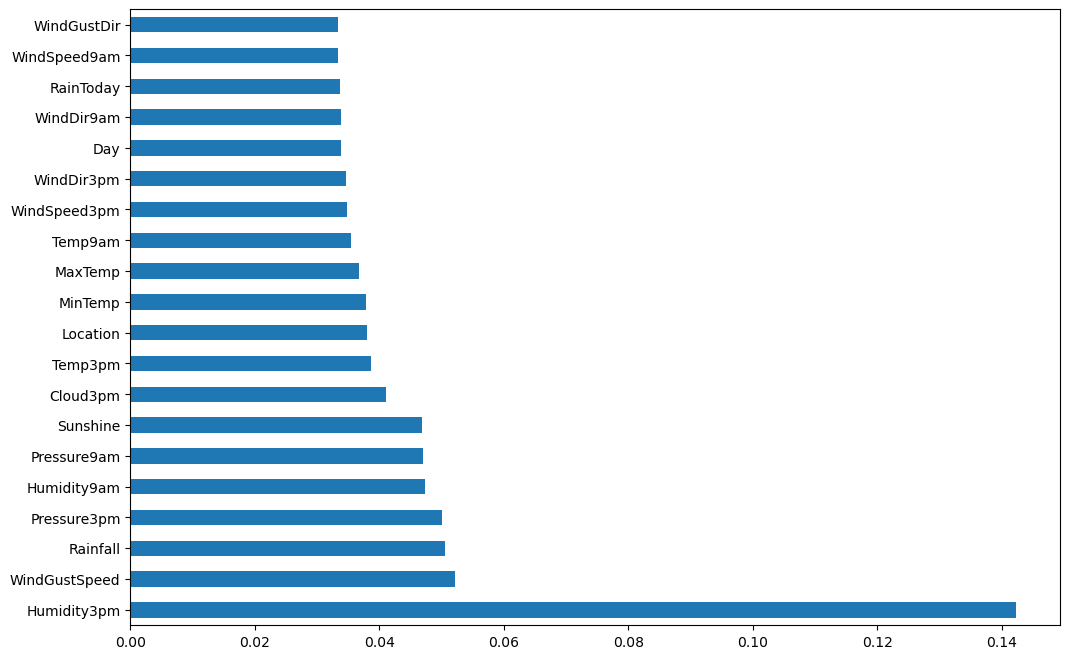

In [11]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

We will consider all the features!